# Datos meteorológicos en Mar Chiquita

El objetivo de este notebook es procesar los datos que me dio Marisa Gasssman del grupo del DCAO. 

Un posible fin de los datos es usarlor para alimentar el modelo mSCOPE con datos meteorológicos para hacer una serie temporal de Evapotranspiración.
Las variables meteorológicos que hay que tener son:

<img src="input-datos_Meteo-mScope.png">


Los datos fueron tomados en una torre de flujo en el sitio en 37.55ºS 57.30ºW en una campaña del 14 de Febrero de 2014 al 9 de Marzo de 2015.

Hay dos archivos de excel con datos:

- Datos convencionales Marchi.xlsx

- Eddy Covariance_flujos.xlsx

Para saber a qué corresponde cada medición usé el archivo METADATOS Marchi.docx
Ese archivo corresponde al segundo sitio de Mar Chiquita, pero sirve porque tiene descripción de las variables que se miden con cada sensor y la notación


In [ ]:
#!pip install openpyxl

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
import datetime
import openpyxl
sns.set()

In [3]:
data = pd.read_excel('Datos Marchi-Romano para Vero.xlsx', parse_dates=['Año'])

In [4]:
data.columns

Index(['Año', 'dia Juliano', 'hora', 'uson (m/s)', 'Ts (m/s)', 'p (hPa)',
       'dir anem (°)', 'e (hPa)', 'es(Ts) (hPa)', 'Dp = es - e (Pa)',
       'ro (kg/m3)', 'u* (m/s)', '1/L (m-1)', 'Rn (W/m2)', 'QE (W/m2)',
       'QH (W/m2)', 'QG (W/m2)', 'lv(Ts) J/kg', 'ra (s/m)', 'gama (Pa/K)',
       's (Pa/K)', 'Tita (Vol/Vol)'],
      dtype='object')

In [5]:
data.head()

,Año,dia Juliano,hora,uson (m/s),Ts (m/s),p (hPa),dir anem (°),e (hPa),es(Ts) (hPa),Dp = es - e (Pa),...,1/L (m-1),Rn (W/m2),QE (W/m2),QH (W/m2),QG (W/m2),lv(Ts) J/kg,ra (s/m),gama (Pa/K),s (Pa/K),Tita (Vol/Vol)
0,2014-01-01,45,1115,6.36,18.09,1028.90,150.7,10.645,20.73,1008.5,...,-0.014,593.1,229.54,278.55,35.84,2457389.2,17.433,67.718,130.415,999.999
1,2014-01-01,45,1130,6.37,17.97,1029.07,156.7,10.466,20.58,1011.4,...,-0.010,510.3,209.92,254.12,36.87,2457656.5,14.713,67.722,129.557,999.999
2,2014-01-01,45,1200,5.80,18.36,1029.45,150.2,11.002,21.09,1008.8,...,-0.015,647.7,230.74,317.97,38.99,2456789.5,15.285,67.771,132.364,999.999
3,2014-01-01,45,1215,6.22,18.25,1029.51,161.5,10.779,20.94,1016.1,...,-0.019,740.4,196.69,269.82,40.06,2457033.8,21.570,67.768,131.567,999.999
4,2014-01-01,45,1230,5.73,18.36,1029.46,156.5,10.732,21.09,1035.8,...,-0.020,773.0,244.45,322.64,59.11,2456789.5,17.950,67.772,132.364,999.999


## Convierto la fecha a datetime

In [6]:
data['year']=pd.DatetimeIndex(data['Año']).year
#data['dia Juliano']=pd.to_datetime(data["dia Juliano"],format='%j')

In [7]:
data["combined"] = data["year"]*1000 + data["dia Juliano"]
data["fecha"] = pd.to_datetime(data["combined"], format = "%Y%j")

In [8]:
data.head()

,Año,dia Juliano,hora,uson (m/s),Ts (m/s),p (hPa),dir anem (°),e (hPa),es(Ts) (hPa),Dp = es - e (Pa),...,QH (W/m2),QG (W/m2),lv(Ts) J/kg,ra (s/m),gama (Pa/K),s (Pa/K),Tita (Vol/Vol),year,combined,fecha
0,2014-01-01,45,1115,6.36,18.09,1028.90,150.7,10.645,20.73,1008.5,...,278.55,35.84,2457389.2,17.433,67.718,130.415,999.999,2014,2014045,2014-02-14
1,2014-01-01,45,1130,6.37,17.97,1029.07,156.7,10.466,20.58,1011.4,...,254.12,36.87,2457656.5,14.713,67.722,129.557,999.999,2014,2014045,2014-02-14
2,2014-01-01,45,1200,5.80,18.36,1029.45,150.2,11.002,21.09,1008.8,...,317.97,38.99,2456789.5,15.285,67.771,132.364,999.999,2014,2014045,2014-02-14
3,2014-01-01,45,1215,6.22,18.25,1029.51,161.5,10.779,20.94,1016.1,...,269.82,40.06,2457033.8,21.570,67.768,131.567,999.999,2014,2014045,2014-02-14
4,2014-01-01,45,1230,5.73,18.36,1029.46,156.5,10.732,21.09,1035.8,...,322.64,59.11,2456789.5,17.950,67.772,132.364,999.999,2014,2014045,2014-02-14


In [9]:
data['hora']=data['hora'].astype(str)

In [10]:
for i in range(0,data.shape[0]):
    if len(data.loc[i,'hora']) < 4:
        data.loc[i,'hora'] = '0'+data.loc[i,'hora']
    else:
        data.loc[i,'hora'] = data.loc[i,'hora']    

In [11]:
data['h'] = data['hora'].str[0:2]
data['m'] = data['hora'].str[-2:]

In [12]:
data['fecha'] = pd.to_datetime({'year':pd.DatetimeIndex(data['fecha']).year, 'month': pd.DatetimeIndex(data['fecha']).month, 'day': pd.DatetimeIndex(data['fecha']).day, 'hour':data['h'], 'minute':data['m']})

In [13]:
data.fecha.head()

0   2014-02-14 11:15:00
1   2014-02-14 11:30:00
2   2014-02-14 12:00:00
3   2014-02-14 12:15:00
4   2014-02-14 12:30:00
Name: fecha, dtype: datetime64[ns]

## Defino el dataset sobre el que vamos a trabajar

Me quedo con el dataset antes de eliminar datos faltantes para chequear consistencia de instancias con el archivo de flujos

In [14]:
datos = data.copy()

In [15]:
z=6;
d=2.6/3;
zo=0.123*6;
zoh=0.0123*6;
k=0.4

In [16]:
Press= 101.3*((293-(0.0065)*6)/293)**5.26; 
data['Delta']= (4098.*data['es(Ts) (hPa)'])/((data['Ts (m/s)']+237.3)**2)#kPa C-1]
Lambda=2.45;
R = 0.28704
Cp=1.013*10**(-3)
Sigma=((Cp*Press)/(0.622*Lambda))
data['epsilon']=data['Delta']/Sigma
data['Rho_air']=(Press/(1.01*(data['Ts (m/s)']+273.15))*R);        
#Qa = 0.62197*e/((Press/100)-(0.378030*e));  
Ra_ustar=data['ra (s/m)']
LE=data['QE (W/m2)']
H=data['QH (W/m2)']

In [17]:
data.columns

Index(['Año', 'dia Juliano', 'hora', 'uson (m/s)', 'Ts (m/s)', 'p (hPa)',
       'dir anem (°)', 'e (hPa)', 'es(Ts) (hPa)', 'Dp = es - e (Pa)',
       'ro (kg/m3)', 'u* (m/s)', '1/L (m-1)', 'Rn (W/m2)', 'QE (W/m2)',
       'QH (W/m2)', 'QG (W/m2)', 'lv(Ts) J/kg', 'ra (s/m)', 'gama (Pa/K)',
       's (Pa/K)', 'Tita (Vol/Vol)', 'year', 'combined', 'fecha', 'h', 'm',
       'Delta', 'epsilon', 'Rho_air'],
      dtype='object')

In [18]:
data['A']=(LE+H);  
data['one']=data.Delta*data.A;   
data['Ga_ustar']=1/Ra_ustar
data['two']=data.Rho_air*Cp**(10**6)*(data['Dp = es - e (Pa)'])**data.Ga_ustar; 
data['three']=(Sigma/data.Delta);
data['Rc']= data['ra (s/m)']*((((data.one+data.two)/(Sigma*LE))-data.three)-1)
data['Gc']=data.Rc/1000

In [19]:
data['Rc']= 1/data['ra (s/m)']*(1/(data['three']*data.A-(data['three']-1)+data['three']/data.Delta))                              

In [20]:
#data['Rc']=(data['Delta']*(data['Rn (W/m2)']-data['QG (W/m2)']-data['QE (W/m2)'])+data.Rho_air*Cp*data['Dp = es - e (Pa)']/ data['ra (s/m)']-data['QE (W/m2)']*Sigma)/(data['QE (W/m2)']*Sigma/ data['ra (s/m)'])

In [21]:
data.describe()

,dia Juliano,uson (m/s),Ts (m/s),p (hPa),dir anem (°),e (hPa),es(Ts) (hPa),Dp = es - e (Pa),ro (kg/m3),u* (m/s),...,Delta,epsilon,Rho_air,A,one,Ga_ustar,two,three,Rc,Gc
count,10417.000000,10417.000000,10417.000000,10417.000000,10417.000000,10417.000000,10417.000000,10417.000000,10417.000000,10417.000000,...,10417.000000,10417.000000,10417.000000,10417.000000,10417.000000,10417.000000,5879.0,10417.000000,10417.000000,5879.000000
mean,169.193146,4.947005,18.194759,1013.283221,191.936535,19.848782,22.327869,247.908717,1.212496,0.382859,...,1.377823,20.475527,0.098794,184.742596,312.802846,0.030939,0.0,0.055319,-0.005089,1.395430
std,126.578515,2.282776,6.385608,5.729514,124.429012,8.227091,8.661384,685.874949,0.030838,0.201262,...,0.468408,6.960916,0.002177,249.934202,457.872381,0.022671,0.0,0.021193,0.537958,19.777036
min,1.000000,0.270000,-1.230000,996.070000,0.050000,0.000000,5.580000,-3397.200000,1.137000,0.011000,...,0.410322,6.097702,0.093860,-489.310000,-688.350620,0.000073,0.0,0.023485,-28.843035,-461.203171
25%,53.000000,3.110000,14.140000,1009.350000,45.410000,13.617000,16.110000,-225.000000,1.190000,0.222000,...,1.044236,15.518167,0.097311,-11.870000,-11.849933,0.015948,0.0,0.040759,0.001059,0.364848
50%,191.000000,4.720000,18.410000,1013.080000,195.900000,18.518000,21.150000,97.800000,1.211000,0.374000,...,1.325522,19.698292,0.098673,77.750000,93.059882,0.029708,0.0,0.050766,0.002605,0.741233
75%,317.000000,6.430000,22.490000,1017.140000,316.200000,26.215000,27.190000,762.300000,1.232000,0.527000,...,1.650959,24.534543,0.100140,337.710000,520.006285,0.043862,0.0,0.064441,0.006599,1.197998
max,365.000000,15.440000,33.360000,1031.910000,359.900000,51.712000,51.220000,2461.900000,1.318000,1.164000,...,2.865256,42.579939,0.105800,3324.150000,4215.905733,0.946970,0.0,0.163996,12.339416,692.765396


In [22]:
data['month']=data.fecha.dt.month
data['hour']=data.fecha.dt.hour

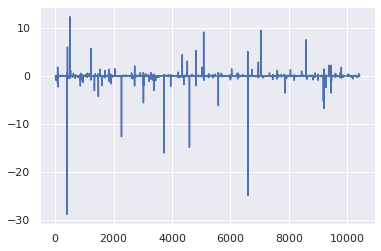

In [23]:
plt.plot(data.Rc)

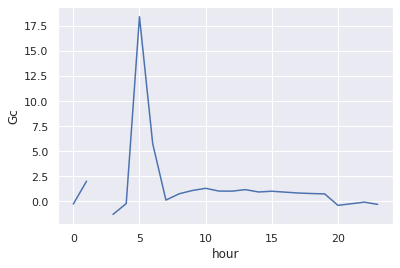

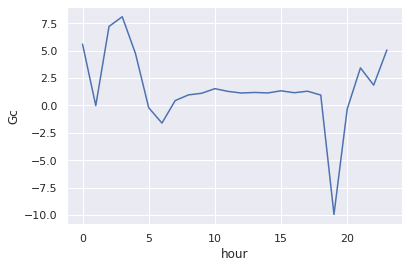

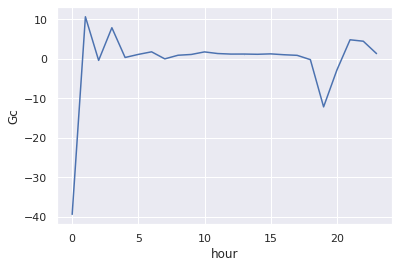

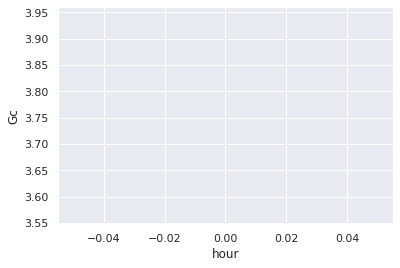

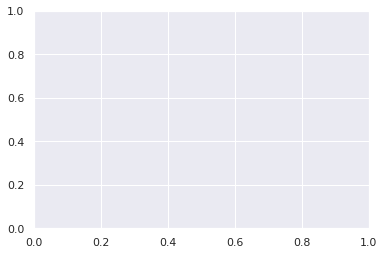

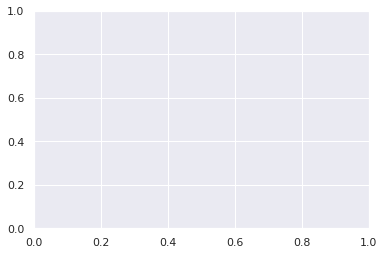

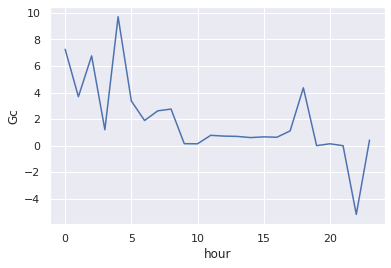

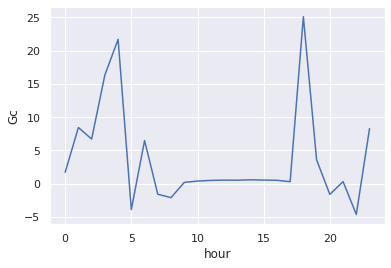

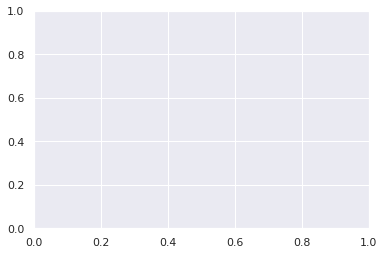

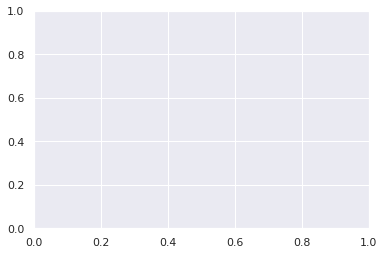

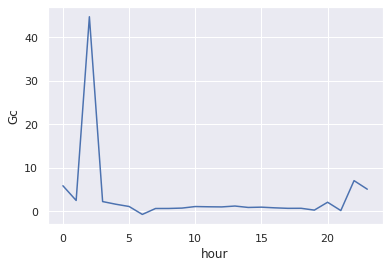

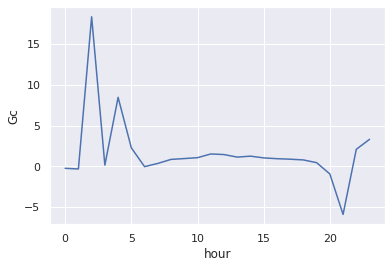

In [24]:
for i in range(1,13):
    sns.lineplot(x='hour',y='Gc',data=data.loc[data.month==i])
    plt.show()

In [25]:
df=data.loc[data.hour>9]
df=df.loc[df.hour< 16]

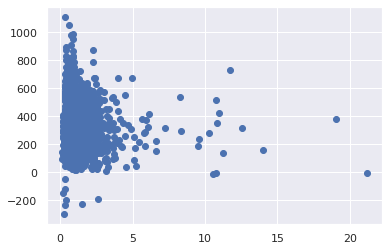

In [26]:
plt.scatter(df.Gc[df.Gc>0],df['QE (W/m2)'][df.Gc>0])

## Resampleo para tener un dato por dia en el gráfico

In [27]:
diario_mean = data.resample('D', on = 'fecha').mean()
diario_mean.head()

,dia Juliano,uson (m/s),Ts (m/s),p (hPa),dir anem (°),e (hPa),es(Ts) (hPa),Dp = es - e (Pa),ro (kg/m3),u* (m/s),...,Rho_air,A,one,Ga_ustar,two,three,Rc,Gc,month,hour
fecha,,,,,,,,,,,,,,,,,,,,,
2014-02-14,45.0,6.196667,18.036000,1029.395333,154.853333,10.538600,20.664667,1012.606667,1.231867,0.601267,...,0.098800,516.770667,671.535848,0.058514,0.0,0.051816,0.002132,0.750843,2.0,13.066667
2014-02-15,46.0,2.966000,17.800000,1029.922000,54.808000,11.343400,20.406000,906.260000,1.233600,0.253600,...,0.098882,24.362000,41.355036,0.023950,0.0,0.052649,0.000193,-5.695940,2.0,6.800000
2014-02-16,47.0,5.038889,21.205556,1026.766667,54.187778,13.332333,25.207778,1187.544444,1.215444,0.450889,...,0.097738,108.181111,182.360398,0.040680,0.0,0.043749,0.005381,0.694014,2.0,6.333333
2014-02-17,48.0,5.854545,23.619091,1019.770909,46.426364,17.334818,29.325818,1199.100000,1.197436,0.502018,...,0.096946,116.540727,220.888379,0.043391,0.0,0.038676,-0.032470,4.286976,2.0,11.618182
2014-02-18,49.0,4.698060,23.705672,1015.738060,82.846716,17.273597,29.345075,1207.147761,1.192179,0.390761,...,0.096915,46.186269,88.796460,0.032870,0.0,0.038311,-0.042237,2.708274,2.0,10.597015


In [28]:
diario_mean.shape

(389, 34)

In [29]:
diario_min = data.resample('D', on = 'fecha').min()
diario_min.head()

,Año,dia Juliano,hora,uson (m/s),Ts (m/s),p (hPa),dir anem (°),e (hPa),es(Ts) (hPa),Dp = es - e (Pa),...,Rho_air,A,one,Ga_ustar,two,three,Rc,Gc,month,hour
fecha,,,,,,,,,,,,,,,,,,,,,
2014-02-14,2014-01-01,45.0,1115,5.73,17.57,1028.90,150.20,9.551,20.06,957.6,...,0.098690,385.56,487.929882,0.046361,0.0,0.050890,0.001741,0.574460,2.0,11.0
2014-02-15,2014-01-01,46.0,0545,2.28,15.98,1029.65,50.93,10.663,18.13,746.7,...,0.098306,-116.68,-135.133923,0.001741,0.0,0.047830,-0.008804,-21.395879,2.0,5.0
2014-02-16,2014-01-01,47.0,0115,3.95,19.11,1025.96,45.84,5.104,22.09,835.8,...,0.097219,-228.64,-326.265969,0.024802,0.0,0.040153,-0.006894,-0.014804,2.0,1.0
2014-02-17,2014-01-01,48.0,0230,2.55,19.38,1017.23,33.66,14.967,22.47,634.8,...,0.096108,-32.74,-52.106315,0.013087,0.0,0.033599,-0.891380,-11.180386,2.0,2.0
2014-02-18,2014-01-01,49.0,0100,2.11,21.46,1013.39,2.19,15.071,25.54,987.0,...,0.096121,-83.46,-134.606262,0.012592,0.0,0.033659,-2.295947,-110.437557,2.0,1.0


In [30]:
diario_max = data.resample('D', on = 'fecha').max()
diario_max.head()

,Año,dia Juliano,hora,uson (m/s),Ts (m/s),p (hPa),dir anem (°),e (hPa),es(Ts) (hPa),Dp = es - e (Pa),...,Rho_air,A,one,Ga_ustar,two,three,Rc,Gc,month,hour
fecha,,,,,,,,,,,,,,,,,,,,,
2014-02-14,2014-01-01,45.0,1530,6.86,18.36,1029.64,161.50,11.002,21.09,1050.9,...,0.098958,674.94,869.840791,0.067967,0.0,0.053173,0.002706,0.976330,2.0,15.0
2014-02-15,2014-01-01,46.0,0915,4.04,19.50,1030.28,57.73,12.347,22.64,1133.3,...,0.099502,223.67,314.677778,0.052604,0.0,0.058102,0.005812,0.780678,2.0,9.0
2014-02-16,2014-01-01,47.0,1030,6.06,22.77,1027.61,59.51,15.250,27.66,1698.6,...,0.098437,309.69,519.004109,0.052801,0.0,0.048872,0.030902,1.040711,2.0,10.0
2014-02-17,2014-01-01,48.0,2315,7.93,26.19,1021.52,59.80,19.250,33.93,1600.8,...,0.098346,330.99,635.926754,0.070811,0.0,0.048147,0.104085,151.381912,2.0,23.0
2014-02-18,2014-01-01,49.0,2300,6.51,26.15,1017.44,358.30,19.086,33.86,1577.6,...,0.097652,307.45,614.662898,0.053129,0.0,0.043049,1.849699,73.042310,2.0,23.0


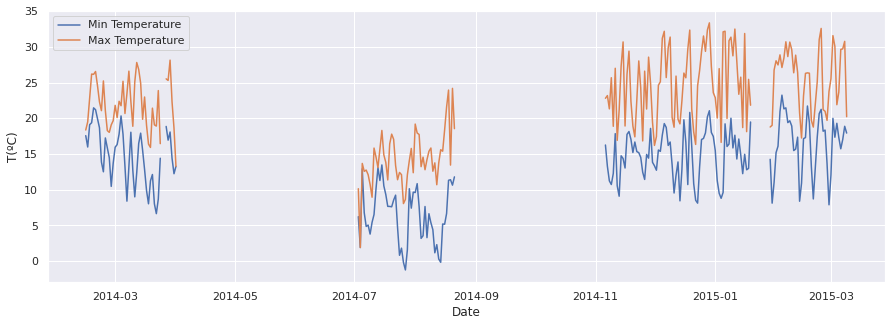

In [31]:
plt.figure(figsize = (15,5))
plt.plot(diario_min.index, diario_min['Ts (m/s)'], label = 'Min Temperature')
plt.plot(diario_max.index, diario_max['Ts (m/s)'], label = 'Max Temperature')
#plt.plot(diario_mean.index, diario_mean['Gc'], label = 'Gc')

plt.xlabel('Date')
plt.ylabel('T(ºC)')
# plt.xlim(datetime.date(1990,1,1), datetime.date(2018,1,1))
# plt.ylim(-10,40)
plt.legend()
plt.show()

In [32]:
evi=pd.read_csv('sitio_2014/evi_2014.csv',parse_dates=['system:time_start'])